In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

%matplotlib inline

#### Simulate male mass and height:

In [2]:
height_male = np.random.randn(50000) * .10 + 1.75 #average of 1.75 meters
mass_male =  np.random.randn(50000) * 10 + 70 #average mass of 70 kilograms

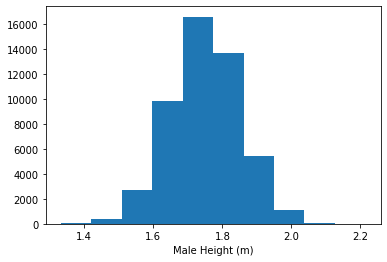

In [3]:
plt.hist(height_male)
plt.xlabel('Male Height (m)')
plt.show()

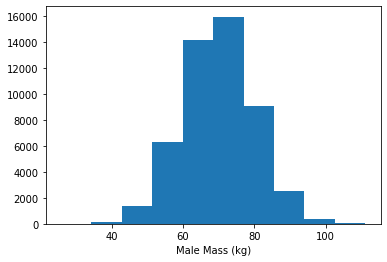

In [4]:
plt.hist(mass_male)
plt.xlabel('Male Mass (kg)')
plt.show()

Calulate BMI:

In [5]:
y = mass_male / (height_male**2)

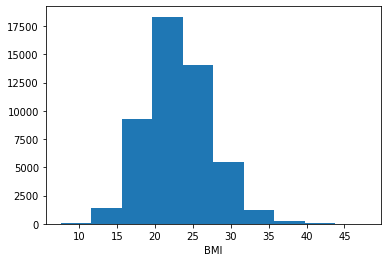

In [6]:
plt.hist(y)
plt.xlabel('BMI')
plt.show()

In [7]:
##stack height and weight together
df = np.column_stack((mass_male,height_male))

define R-squared for keras:

In [8]:
def R_Squared(y_true, y_pred):
    from tensorflow.keras import backend as K
    SS_res =  K.sum(K.square( y_true-y_pred ))
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) )
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

Create/run the model:

In [9]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(16, activation=tf.nn.relu,input_shape = (2,)))
model.add(tf.keras.layers.Dense(16, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(16, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(1))

model.compile(optimizer = 'adam',loss = 'mean_squared_error',metrics=[R_Squared])

model.fit(df,y,epochs = 10)

W0905 13:52:28.493876 41644 deprecation.py:506] From c:\users\jsnyder2\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Epoch 1/10
50000/50000 [==============================] - 3s 64us/sample - loss: 9.1539 - R_Squared: 0.4540
Epoch 2/10
50000/50000 [==============================] - 3s 55us/sample - loss: 7.1236 - R_Squared: 0.5772
Epoch 3/10
50000/50000 [==============================] - 3s 56us/sample - loss: 6.6007 - R_Squared: 0.6065
Epoch 4/10
50000/50000 [==============================] - 3s 56us/sample - loss: 5.5640 - R_Squared: 0.6664
Epoch 5/10
50000/50000 [==============================] - 3s 56us/sample - loss: 3.7522 - R_Squared: 0.7747
Epoch 6/10
50000/50000 [==============================] - 3s 57us/sample - loss: 1.2574 - R_Squared: 0.9258
Epoch 7/10
50000/50000 [==============================] - 3s 57us/sample - loss: 0.2296 - R_Squared: 0.9869
Epoch 8/10
50000/50000 [==============================] - 3s 61us/sample - loss: 0.1439 - R_Squared: 0.9918
Epoch 9/10
50000/50000 [==============================] - 3s 58us/sample - loss: 0.1370 - R_Squared: 0.9921
Epoch 10/10
50000/50000 [===